In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

from Functions import *

In [2]:
omega0 = 0.5e-2 # [m] Beam radius at the focus
b= 2*np.pi*omega0**2/lambda_355 # NOTE: this is initial b from output of laser
zR = b / 2     # [m] Rayleigh Range


params = {'b' : b,            # [m] confocal parameter
          'zR' : zR,           # [m] Rayleigh range
          'omega0' : omega0,    # [m] beam waist at focus
          'lambda' : lambda_355}

In [3]:
b

442.4778385337737

In [5]:
def free_space(q1,z):
    return q1+z

def thin_lens(q1,f):
    q2 = 1/((1/q1)-(1/f))
    return q2

def q_to_params(q,params):
    wavelength = params['lambda']
    q_inv = 1/q
    Im_q_inv = q_inv.imag
    Re_q = q.real
    omega_final = np.sqrt(-wavelength/(np.pi*Im_q_inv))
    focus_final = Re_q

    print('positon relative to focus: ',focus_final,'[m]')
    print("beam spot size: ", omega_final,'[m]')


Inital
positon relative to focus:  0.0 [m]
beam spot size:  0.005 [m]
After 0.75 [m] of free space propagation
positon relative to focus:  0.75 [m]
beam spot size:  0.005000028730172337 [m]
After propagation through f=50cm lens
positon relative to focus:  -0.5000012768985863 [m]
beam spot size:  0.005000028730172337 [m]


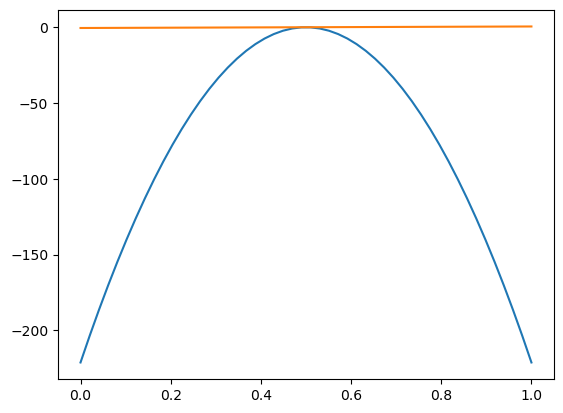

In [10]:

zR = params['zR']
L = 0.75 # [m] before first lens
f1 = 50e-2 #[m] focal length
q_inital = complex(0,zR) # i*zR

print('Inital')
q_to_params(q_inital,params)

q0 = free_space(q_inital,L)
print('After 0.75 [m] of free space propagation')
q_to_params(q0,params)

q_final =thin_lens(q0,f1) #propagation through thin lens
print('After propagation through f=50cm lens')
q_to_params(q_final,params)

z = np.linspace(0,1)
q_after = lambda x: free_space(q_final,x)
q_inv = 1/q_after(z)
plt.plot(z,1/q_inv.imag)
plt.plot(z,1/q_inv.real)


In [81]:
omega0 = params['omega0']
zR = params['zR']
L = 0.75 # [m] before first lens
f1 = 0.5 #[m] focal length
q_inital = complex(0,zR) # i*zR

print('Initial')
q_to_params(q_inital,params) 

q_final=thin_lens(q_inital,f1) #propagation through thin lens
print('After propagation through f=50cm lens')
q_to_params(q_final,params)



Initial
positon relative to focus:  0.0 [m]
beam spot size:  0.0003604857986586053 [m]
After propagation through f=50cm lens
positon relative to focus:  -0.4205087440381558 [m]
beam spot size:  0.0003604857986586053 [m]


In [82]:
omega0 = params['omega0']
zR = params['zR']
L = 0.75 # [m] before first lens
f1 = 50e-2 #[m] focal length

q_inital = complex(0,zR) # i*zR
print('Initial')
q_to_params(q_inital,params) 

q1 = free_space(q_inital,zR)
print('After 1 zR of free space propagation')
q_to_params(q1,params)


q_final=thin_lens(q_inital,f1) #propagation through thin lens
print('After propagation through f=50cm lens')
q_to_params(q_final,params)


Initial
positon relative to focus:  0.0 [m]
beam spot size:  0.0003604857986586053 [m]
After 1 zR of free space propagation
positon relative to focus:  1.15 [m]
beam spot size:  0.0005098039055058965 [m]
After propagation through f=50cm lens
positon relative to focus:  -0.4205087440381558 [m]
beam spot size:  0.0003604857986586053 [m]
